# Using Online Prices for Measuring Consumption: the UK and Russia case

### Data Collection

Before the data processing the data (item name, link to the product, price) were scraped using Google Web Scrapor from the UK and Russia electronics websites and saved as separate .csv files. The challenge was to consolidate > 120 .csv files with different column name to the one data frame and assign other attributes in line with World Bank Methodology.

###  Importing packages

In [89]:
import csv
import pandas as pd
import glob
import os
import numpy as np
from scipy import stats as scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from pandas import DataFrame
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

###  Defining function to consolidate and synchronize all CSV files
Functions consolidate all CSV files from given folder based on the columns selected and appends everything to the list. In addition to that, it assigns such criteria to data as Basic Heading, Category, Retailers based on the path name and arguments given to the function. It also converts all prices from strings to values and harmonizes headers. 

In [90]:
#Basic Function for files consolidation

def prepareData(country,retailer):
    path ="C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Retailers/" + country + "/" + retailer
    print("reading from: ",path)
    filenames = glob.glob(path + "/*.csv")
    
    finaldata = []
    
    for index,filename in enumerate(filenames):
        
        temp = pd.read_csv(filename)
        webscraperorder_col,webscraperstart_url,name_col,price_col = 0,1,0,0
        for i in range(len(temp.columns)):
            if ("Name" in temp.columns[i] or "name" in temp.columns[i]):
                name_col = i
            elif ("Price" in temp.columns[i] or "price" in temp.columns[i]):
                price_col = i
        
        temp = pd.read_csv(filename, usecols=[webscraperorder_col,webscraperstart_url,name_col,price_col])
        temp = temp.rename(columns={'name':'Name','price':'Price'})
        temp['Price'] = temp['Price'].astype(str).str.replace('₽', '')
        temp['Price'] = temp['Price'].astype(str).str.replace('£', '')
        temp['Price'] = temp['Price'].astype(str).str.replace(',', '')
        temp['Price'] = temp['Price'].astype(str).str.replace(' ', '')
        temp['Price'] = temp['Price'].astype(float)
        temp['Type of item'] = os.path.basename(filename)
        temp['Type of item'] = temp['Type of item'].astype(str).str.replace('.xlsx', '') #new
        temp['Type of item'] = temp['Type of item'].astype(str).str.replace('.csv', '') #new
        temp['Retailer'] = retailer
        temp['Country'] = country
        if 'ssd' in filename or 'hdd' in filename:
            temp['BH'] = "Recording Media"
        elif 'cocoa' in filename or 'coffee' in filename or 'tea' in filename:
            temp['BH'] = "Coffee, tea and cocoa"
        elif 'juice' in filename or 'mineral water' in filename or 'soft drinks' in filename:
            temp['BH'] = "Mineral waters, soft drinks, fruit and vegetable juices "
        else:
            temp['BH'] = "Audio-visual, photographic and information processing equipment"
        
        if 'cocoa' in filename or "coffee" in filename or "tea"in filename or "mineral water" in filename or "juice" in filename or "soft drinks" in filename:
            temp['Category'] = "NON-ALCOHOLIC BEVERAGES"
        else:
            temp['Category'] = "RECREATION AND CULTURE"    
        
        
        finaldata.append(temp)   
    
    finaldata = pd.concat(finaldata,sort=False,ignore_index=True)
    return finaldata


In [91]:
#Function for Russian retailers of Non-alcoholic beverages. It was needed due to the different properties of Russian data

def prepareData_Russia(country,retailer):
    path ="C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Retailers/" + country + "/" + retailer
    print("reading from: ",path)
    filenames = glob.glob(path + "/*.csv")
    
    finaldata = []
    
    for index,filename in enumerate(filenames):
        
        temp = pd.read_csv(filename)
        webscraperorder_col,webscraperstart_url,name_col,price_col = 0,1,0,0
        for i in range(len(temp.columns)):
            if ("Name" in temp.columns[i] or "name" in temp.columns[i]):
                name_col = i
            elif ("price per unit" in temp.columns[i]):
                price_col = i
        
        temp = pd.read_csv(filename, usecols=[webscraperorder_col,webscraperstart_url,name_col,price_col])
        temp = temp.rename(columns={'name':'Name'})
        temp["price per unit"] = temp["price per unit"].astype(str).str.replace('₽', '')
        temp["price per unit"] = temp["price per unit"].astype(str).str.replace('£', '')
        temp["price per unit"] = temp["price per unit"].astype(str).str.replace(',', '')
        temp["price per unit"] = temp["price per unit"].astype(str).str.replace(' ', '')
        temp["price per unit"] = temp["price per unit"].astype(float)
        temp['Price'] = temp["price per unit"]*100
        temp['Type of item'] = os.path.basename(filename)
        temp['Type of item'] = temp['Type of item'].astype(str).str.replace('.xlsx', '') #new
        temp['Type of item'] = temp['Type of item'].astype(str).str.replace('.csv', '') #new
        temp['Retailer'] = retailer
        temp['Country'] = country
        if 'cocoa' in filename or "coffee" in filename or "tea" in filename:
            temp['BH'] = "Coffee, tea and cocoa"
        else:
            temp['BH'] = "Mineral waters, soft drinks, fruit and vegetable juices " 
        
        if 'cocoa' in filename or "coffee" in filename or "tea"in filename or "mineral water" in filename or "juice" in filename or "soft drinks" in filename:
            temp['Category'] = "NON-ALCOHOLIC BEVERAGES"
        else:
            temp['Category'] = "RECREATION AND CULTURE"    
        
        finaldata.append(temp)   
    
    finaldata = pd.concat(finaldata,sort=False,ignore_index=True)
    return finaldata


###  Launching created function for each retailer

In [92]:
datum = []
datum.append(prepareData( "Russia","Citilink"))
datum.append(prepareData( "Russia","DNS"))
datum.append(prepareData( "Russia","Ozon"))
datum.append(prepareData( "UK","Amazon"))
datum.append(prepareData( "UK","Argos"))
datum.append(prepareData( "UK","Curry"))
datum.append(prepareData_Russia("Russia","Auchan"))
datum.append(prepareData_Russia("Russia","Magnit"))
datum.append(prepareData_Russia("Russia","Lenta"))
datum.append(prepareData("UK","Asda"))
datum.append(prepareData("UK","Sainsbury"))
datum.append(prepareData("UK","Tesco"))

reading from:  C:\Users\khari\Desktop\Siegen\Applied Macroeconometrics\Final Project\Topic 10\market_analysis\Retailers/Russia/Citilink
reading from:  C:\Users\khari\Desktop\Siegen\Applied Macroeconometrics\Final Project\Topic 10\market_analysis\Retailers/Russia/DNS
reading from:  C:\Users\khari\Desktop\Siegen\Applied Macroeconometrics\Final Project\Topic 10\market_analysis\Retailers/Russia/Ozon
reading from:  C:\Users\khari\Desktop\Siegen\Applied Macroeconometrics\Final Project\Topic 10\market_analysis\Retailers/UK/Amazon
reading from:  C:\Users\khari\Desktop\Siegen\Applied Macroeconometrics\Final Project\Topic 10\market_analysis\Retailers/UK/Argos
reading from:  C:\Users\khari\Desktop\Siegen\Applied Macroeconometrics\Final Project\Topic 10\market_analysis\Retailers/UK/Curry
reading from:  C:\Users\khari\Desktop\Siegen\Applied Macroeconometrics\Final Project\Topic 10\market_analysis\Retailers/Russia/Auchan
reading from:  C:\Users\khari\Desktop\Siegen\Applied Macroeconometrics\Final Pr

###  Merging and saving results

In [93]:
data = pd.concat(datum,sort=False,ignore_index=True)
data.to_csv("data.csv")

###  Check data properties and concatination result

In [94]:
# Check number of items, number of BH, number of retailers and countries
len(data['BH'].unique())
len(data['Retailer'].unique())
len(data['Country'].unique())
len(data['Type of item'].unique())

28

In [95]:
# Data Frame shape
data.shape

(3892, 11)

In [96]:
# Display first 5 rows
data.head()

,web-scraper-order,web-scraper-start-url,Name,Price,Type of item,Retailer,Country,BH,Category,Unnamed: 0,price per unit
0,1625743927-256,https://www.citilink.ru/catalog/ekshn-kamery/,"Экшн-камера SONY FDR-X3000 4K, WiFi, белый [...",39990.0,action camera,Citilink,Russia,"Audio-visual, photographic and information pro...",RECREATION AND CULTURE,NaN,NaN
1,1625744077-268,https://www.citilink.ru/catalog/ekshn-kamery/,"Экшн-камера DIGMA DiCam 300 4K, WiFi, серый ...",1890.0,action camera,Citilink,Russia,"Audio-visual, photographic and information pro...",RECREATION AND CULTURE,NaN,NaN
2,1625743934-258,https://www.citilink.ru/catalog/ekshn-kamery/,"Экшн-камера REKAM A310 4K, WiFi, черный [268...",3130.0,action camera,Citilink,Russia,"Audio-visual, photographic and information pro...",RECREATION AND CULTURE,NaN,NaN
3,1625743899-255,https://www.citilink.ru/catalog/ekshn-kamery/,"Экшн-камера GOPRO Max CHDHZ-202-RX 5.6K, WiFi...",46990.0,action camera,Citilink,Russia,"Audio-visual, photographic and information pro...",RECREATION AND CULTURE,NaN,NaN
4,1625743884-254,https://www.citilink.ru/catalog/ekshn-kamery/,"Экшн-камера DIGMA DiCam 520 4K, WiFi, серый ...",NaN,action camera,Citilink,Russia,"Audio-visual, photographic and information pro...",RECREATION AND CULTURE,NaN,NaN


###  Data Clearing and Analysis

In [97]:
#Remove implausible observations
data.dropna(subset = ["Price"], inplace=True)

Further investigating such data properties as mean, count, std by different slices

In [98]:
#Creating pivot table with the groups of items by country

pivot = data.pivot_table(
    ["Price"],
    ["Country","Category", "BH", "Type of item"],
    aggfunc= ["mean","count", "std"]
)

pivot.to_csv("pivot_country.csv")
pivot



mean  \
                                                                                                         Price   
Country Category                BH                                                 Type of item                  
Russia  NON-ALCOHOLIC BEVERAGES Coffee, tea and cocoa                              cocoa             60.345283   
                                                                                   coffee           349.302667   
                                                                                   tea              184.572093   
                                Mineral waters, soft drinks, fruit and vegetabl... juice              9.924051   
                                                                                   mineral water     10.275820   
                                                                                   soft drinks        8.667778   
        RECREATION AND CULTURE  Audio-visual, photographic and information proc... action camera  10598.770492   
                                                                                   cctv            3740.068627   
                                                                                   ear buds        4213.545455   
                                                                                   handy          24340.223684   
                                                                                   ipad           58697.813725   
                                                                                   iphone         64960.013158   
                                                                                   laptop 1       90986.870370   
                                                                                   laptop 2       84489.567164   
                                                                                   laptop 3       51429.733333   
                                                                                   laptop 4       98161.451613   
                                                                                   loudspeaker     7221.064516   
                                                                                   monitor 24     14765.773810   
                                                                                   monitor 27     19178.906667   
                                                                                   smart speaker   8328.230769   
                                                                                   smart watch     7762.766917   
                                                                                   tablet         14383.382022   
                                                                                   tv 39          23851.113636   
                                                                                   tv 55          44241.957143   
                                Recording Media                                    hdd 1 tb        4491.236842   
                                                                                   hdd 2 tb        6168.023256   
                                                                                   ssd 1 tb       12155.361702   
                                                                                   ssd 2 tb       27899.258065   
UK      NON-ALCOHOLIC BEVERAGES Coffee, tea and cocoa                              cocoa              1.321573   
                                                                                   coffee             2.125966   
                                                                                   tea                2.479601   
                                Mineral waters, soft drinks, fruit and vegetabl... juice              0.144763   
                                                                                   mineral water      0.071510   
  

In [99]:
#Creating pivot table with the groups of items by Retailer for data disctribution for Recreation and Culture
data_BH1 = data[data["Category"] == "RECREATION AND CULTURE"]

pivot_category1 = data_BH1.pivot_table(
    ["Price"],
    ["BH", "Type of item", "Retailer"],
    aggfunc= ["count"]
)
pivot_category1.to_csv("Data by Retailers_Recreation and Culture.csv")
pivot_category1.unstack()

count        \
                                                                  Price         
Retailer                                                         Amazon Argos   
BH                                                 Type of item                 
Audio-visual, photographic and information proc... action camera     21     9   
                                                   cctv              21    12   
                                                   ear buds          11    30   
                                                   handy             19    15   
                                                   ipad              20    25   
                                                   iphone            14    60   
                                                   laptop 1          13     5   
                                                   laptop 2          18    11   
                                                   laptop 3          17     6   
                                                   laptop 4          11     7   
                                                   loudspeaker       22    33   
                                                   monitor 24        17     9   
                                                   monitor 27        10    15   
                                                   smart speaker     18    30   
                                                   smart watch       36    33   
                                                   tablet            10    30   
                                                   tv 39             27    42   
                                                   tv 55             16    60   
Recording Media                                    hdd 1 tb          16     8   
                                                   hdd 2 tb          17    16   
                                                   ssd 1 tb          13     9   
                                                   ssd 2 tb          10     3   

                                                                           \
                                                                            
Retailer                                                         Citilink   
BH                                                 Type of item             
Audio-visual, photographic and information proc... action camera        9   
                                                   cctv                48   
                                                   ear buds            12   
                                                   handy               40   
                                                   ipad                48   
                                                   iphone              40   
                                                   laptop 1            12   
                                                   laptop 2            18   
                                                   laptop 3            15   
                                                   laptop 4            29   
                                                   loudspeaker         39   
                                                   monitor 24          48   
                                                   monitor 27          48   
                                                   smart speaker       11   
                                                   smart watch         85   
                                                   tablet              47   
                                                   tv 39               34   
                                                   tv 55               17   
Recording Media                                    hdd 1 tb            10   
                                                   hdd 2 tb             9   
                                                   ssd 1 tb            12   
                                  

In [100]:
#Creating pivot table with the groups of items by Retailer for Non-Alcoholic Beverages
data_BH2 = data[data["Category"] == "NON-ALCOHOLIC BEVERAGES"]

pivot_category2 = data_BH2.pivot_table(
    ["Price"],
    ["BH", "Type of item", "Retailer"],
    aggfunc= ["count"]
)

pivot_category2.to_csv("Data by Retailers_Non-Alcoholic Beverages.csv")
pivot_category2.unstack()

count         \
                                                                 Price          
Retailer                                                          Asda Auchan   
BH                                                 Type of item                 
Coffee, tea and cocoa                              cocoa            60     29   
                                                   coffee           60     40   
                                                   tea              62     13   
Mineral waters, soft drinks, fruit and vegetabl... juice            60     40   
                                                   mineral water    22     40   
                                                   soft drinks      60     19   

                                                                               \
                                                                                
Retailer                                                         Lenta Magnit   
BH                                                 Type of item                 
Coffee, tea and cocoa                              cocoa            14     10   
                                                   coffee           11      9   
                                                   tea              14     16   
Mineral waters, soft drinks, fruit and vegetabl... juice            20     19   
                                                   mineral water    19     19   
                                                   soft drinks      20     24   

                                                                            \
                                                                             
Retailer                                                         Sainsbury   
BH                                                 Type of item              
Coffee, tea and cocoa                              cocoa                 5   
                                                   coffee               61   
                                                   tea                  62   
Mineral waters, soft drinks, fruit and vegetabl... juice                59   
                                                   mineral water        60   
                                                   soft drinks          55   

                                                                        
                                                                        
Retailer                                                         Tesco  
BH                                                 Type of item         
Coffee, tea and cocoa                              cocoa            24  
                                                   coffee           24  
                                                   tea              24  
Mineral waters, soft drinks, fruit and vegetabl... juice            20  
                                                   mineral water    16  
                                                   soft drinks      24

###  Calculating PPP and PLI on item level

In [101]:
# Calculating PPP by items: 

PPP_item = pivot.loc['Russia', "mean"] / pivot.loc['UK', "mean"]
PPP_item.rename(columns={ PPP_item.columns[0]: "PPP"}, inplace = True)

# Set exchange rate of russia Rub to GDP (16.07.21)
exchange_rate_GBP_Rub = 101.96

#Calculate PLI and add to the new column
PPP_item["PLI"] = (pivot.loc['Russia', "mean"] / pivot.loc['UK', "mean"])/exchange_rate_GBP_Rub
PPP_item

PPP_item.to_csv("PPP by items.csv")
PPP_item

PPP  \
Category                BH                                                 Type of item                
NON-ALCOHOLIC BEVERAGES Coffee, tea and cocoa                              cocoa           45.661709   
                                                                           coffee         164.303073   
                                                                           tea             74.436196   
                        Mineral waters, soft drinks, fruit and vegetabl... juice           68.553973   
                                                                           mineral water  143.697260   
                                                                           soft drinks     50.339313   
RECREATION AND CULTURE  Audio-visual, photographic and information proc... action camera   89.299961   
                                                                           cctv            33.285281   
                                                                           ear buds        41.997514   
                                                                           handy           89.309419   
                                                                           ipad            96.349027   
                                                                           iphone          91.186258   
                                                                           laptop 1       149.997599   
                                                                           laptop 2       112.308423   
                                                                           laptop 3        81.063785   
                                                                           laptop 4        90.071665   
                                                                           loudspeaker     76.596230   
                                                                           monitor 24      93.242845   
                                                                           monitor 27      87.468790   
                                                                           smart speaker   55.752928   
                                                                           smart watch     45.976999   
                                                                           tablet          74.169784   
                                                                           tv 39           55.736847   
                                                                           tv 55           53.009957   
                        Recording Media                                    hdd 1 tb        98.071673   
                                                                           hdd 2 tb        92.348673   
                                                                           ssd 1 tb        72.879167   
                                                                           ssd 2 tb        97.809596   

                                                                                               PLI  
Category                BH                                                 Type of item             
NON-ALCOHOLIC BEVERAGES Coffee, tea and cocoa                              cocoa          0.447839  
                                                                           coffee         1.611446  
                                                                           tea            0.730053  
                        Mineral waters, soft drinks, fruit and vegetabl... juice          0.672361  
                                                                           mineral water  1.409349  
                                                                           soft drinks    0.493716  
RECREATION AND CULTURE  Audio-visual, photographic and information proc... action camera  0.875833  
                                                                   

###  Checking hypothesis for PLI results for Coffee and Mineral Water
PLI for Coffee and Mineral Water for Russia is significantly > 1. Given GDP per capita of Russia and the UK, this result is contrintuitive. In this section brands within items are investigated.
Hypothesis: the UK market at the major retailers is dominated by own brands of retailers (which are by default cheaper than other brands) while Russian - by internation and domestic brands (more expensive).

In [102]:
# Selecting data for the UK coffee and assigning brands

pd.options.mode.chained_assignment = None
name_UK = data[(data["Country"] == "UK") & (data["Type of item"] == "coffee")]
name_UK_coffee = name_UK["Name"].str.split(" ", n = 1, expand = True)
name_UK_coffee
name_UK["Name"] = name_UK_coffee.loc[:,0]
name_UK["Country"]="UK"


In [103]:
# Selecting data for Russia coffee and and assigning brands
pd.options.mode.chained_assignment = None
name_Russia_L = data[(data["Country"] == "Russia") & (data["Type of item"] == "coffee") & (data["Retailer"] == "Lenta")]
name_Russia_A = data[(data["Country"] == "Russia") & (data["Type of item"] == "coffee") & (data["Retailer"] == "Auchan")]
name_Russia_M = data[(data["Country"] == "Russia") & (data["Type of item"] == "coffee") & (data["Retailer"] == "Magnit")]
name_Russia_coffee_L = name_Russia_L["Name"].str.split(" ", n = 4, expand = True)
name_Russia_coffee_A = name_Russia_A["Name"].str.split(" ", n = 4, expand = True)
name_Russia_coffee_M = name_Russia_M["Name"].str.split(" ", n = 4, expand = True)


name_Russia_L["Name"] = name_Russia_coffee_L.loc[:,2]
name_Russia_A["Name"] = name_Russia_coffee_A.loc[:,2]
name_Russia_M["Name"] = name_Russia_coffee_M.loc[:,1] 

name_Russia_coffee = pd.concat([name_Russia_L,name_Russia_A, name_Russia_M],axis=0)
name_Russia_coffee["Country"]="Russia"
name_Russia_coffee["Price"] = name_Russia_coffee["Price"]/exchange_rate_GBP_Rub  


In [104]:
# Concatenating UK and Russia data and displaying results in pivot table

coffee_Russia_UK = pd.concat([name_Russia_coffee,name_UK ],axis=0)

pivot_coffee_Russia_UK = coffee_Russia_UK.pivot_table(
    ["Price"],
    ["Country", "Name"],
    aggfunc= ["mean", "count"]
)

pivot_coffee_Russia_UK


mean count
                        Price Price
Country Name                       
Russia  AMBASSADOR   3.840526     1
        Absolut      3.213025     2
        Ambassador   1.186740     1
        BUSHIDO      5.474696     2
        Carte        3.961112     4
        DAVIDOFF     5.198117     1
        Darte        2.447038     2
        Davidoff     4.629266     3
        Egoiste      5.282071     5
        Fresco       2.752060     6
        Gold         2.142997     1
        Grandos      3.673009     1
        JACOBS       3.461112     2
        Jacobs       2.905061    16
        Jardin       2.648097     2
        Milagro      1.122989     1
        NESCAFE      3.767033     3
        Nescafe      2.255787     2
        Noire        1.157317     1
        STARBUCKS    4.130149     2
        ЧЕРНАЯ       3.159180     1
        с            6.375049     1
UK      ASDA         1.122917    12
        Cafedirect   3.000000     1
        Cafédirect   1.320000     1
        Carte        4.000000     1
        Coffee       0.520000     3
        Costa        1.850000     1
        Douwe        2.828571     7
        Emmi         6.740000     2
        Kenco        2.165714    21
        L'OR         2.468000     5
        L'or.        3.270000     2
        Lavazza      1.265000     4
        Mellow       1.790000     1
        NESCAFE      1.870000     1
        Nescafe      2.172000    35
        Nescafé      3.075714    14
        Rombouts     1.200000     1
        Sainsbury's  1.401429    14
        Starbucks    5.300000     1
        Stockwell    0.700000     1
        Tassimo      2.502000     5
        Taylors      1.657143     7
        Tesco        1.338000     5

In [105]:
# Selecting data for the UK mineral water and assigning brands

pd.options.mode.chained_assignment = None
name_UK_min = data[(data["Country"] == "UK") & (data["Type of item"] == "mineral water")]

name_UK_min_short = name_UK_min["Name"].str.split(" ", n = 1, expand = True)
name_UK_min_short
name_UK_min["Name"] = name_UK_min_short.loc[:,0]
name_UK_min["Country"]="UK"
name_UK_min
pivot_name_UK_min = name_UK_min.pivot_table(
    ["Price"],
    ["Name"],
    aggfunc= ["mean", "count"]
)

pivot_name_UK_min

,mean,count
,Price,Price
Name,,
ASDA,0.023167,6
Buxton,0.041500,10
Dash,0.300000,2
Evian,0.081333,12
Harrogate,0.120000,3
Highland,0.064000,5
Hubbard's,0.010000,1
Nestle,0.030000,2


In [106]:
# Selecting data for Russia mineral water and assigning brands

pd.options.mode.chained_assignment = None
name_Russia_L_w = data[(data["Country"] == "Russia") & (data["Type of item"] == "mineral water") & (data["Retailer"] == "Lenta")]
name_Russia_A_w = data[(data["Country"] == "Russia") & (data["Type of item"] == "mineral water") & (data["Retailer"] == "Auchan")]
name_Russia_M_w = data[(data["Country"] == "Russia") & (data["Type of item"] == "mineral water") & (data["Retailer"] == "Magnit")]
name_Russia_min_L = name_Russia_L_w["Name"].str.split(" ", n = 3, expand = True)
name_Russia_min_A = name_Russia_A_w["Name"].str.split(" ", n = 3, expand = True)
name_Russia_min_M = name_Russia_M_w["Name"].str.split(" ", n = 3, expand = True)
name_Russia_L_w["Name"] = name_Russia_min_L.loc[:,2]
name_Russia_A_w["Name"] = name_Russia_min_A.loc[:,2]
name_Russia_M_w["Name"] = name_Russia_min_M.loc[:,1] 

name_Russia_min = pd.concat([name_Russia_L_w,name_Russia_A_w, name_Russia_M_w],axis=0)
name_Russia_min["Country"]="Russia"
name_Russia_min["Price"] = name_Russia_min["Price"]/exchange_rate_GBP_Rub  

pivot_min_Russia = name_Russia_min.pivot_table(
    ["Price"],
    ["Country", "Name"],
    aggfunc= ["mean", "count"]
)

pivot_min_Russia


mean count
                          Price Price
Country Name                         
Russia  Acqua          0.177957     2
        BAIKAL         0.091202     1
        BONAQUA        0.075193     3
        BONVIDA        0.039231     1
        Borjomi        0.164353     3
        Borjomi,       0.146855     2
        Donat          0.167213     1
        EVIAN          0.176540     1
        Evian          0.157967     2
        Flavored       0.205963     1
        JEVEA          0.078462     2
        Legend         0.074892     2
        Mever          0.049019     1
        Mivela         0.119645     1
        PERRIER        0.215771     1
        POKROVSKA      0.051777     1
        Perrier        0.240650     2
        S.PELLEGRINO   0.176540     1
        SULINKA        0.098078     1
        San            0.126507     2
        Sanpellegrino  0.161769     2
        Stelmas        0.034765     2
        Sulinka        0.089439     1
        Svetla         0.089571     1
        VITTEL         0.196155     2
        Vittel         0.124362     2
        Volvic         0.106571     1
        «Cенежская»    0.019936     1
        «Архыз»        0.032849     2
        «Аш-Тау»       0.037917     1
        «БЖНИ»         0.158866     1
        «Джермук»      0.102476     2
        «Джигем»       0.020263     1
        «Калинов       0.015442     1
        «ПСЫЖ»         0.039133     1
        «Рычал-Су»     0.051481     1
        «Эдельвейс»    0.016667     1
        КАЛИНОВ        0.019616     2
        Моя            0.029423     1
        САНАТОРИО      0.068654     1
        СВЯТОЙ         0.029423     2
        СТЭЛМАС        0.029423     1
        детская        0.078462     1
        минеральная    0.098078     8
        питьевая       0.098078     6
        природная      0.058847     2

=> Hypothesis confirmed

###  Preparing Data for PPP aggregation at Basic Heading (BH) level
After PPP and PLI are obtained at Item level and the results are checked, these results shouls be aggregated to the Basic Heading Level (based on the World Bank Methodology)

In [107]:
# Preparing Summary table in required format
summary = data.groupby(["BH", "Type of item", "Country" ])[["Price"]].describe(percentiles=[])

# Assign importance criteria for Basic Headings
summary["Importance"] = 1
summary.to_csv("Summary.csv")

In [108]:
# Uploading required data
prices = pd.read_csv("C:\\Users\khari\Desktop\Siegen\Applied Macroeconometrics\Final Project\Topic 10\market_analysis\summary_fixed.csv", header=0)
prices.columns

Index(['BH', 'Type of item', 'Country', 'count', 'Price', 'std', 'min', '50%',
       'max', 'Importance'],
      dtype='object')

In [109]:
# Select the base or numeraire currency
numeraire = 'UK'

In [110]:
# Create dummies for every items and for Russia
prices = pd.get_dummies(prices, columns = ['Type of item'])
country_d = pd.get_dummies(prices['Country'])
country_d.drop(numeraire, axis=1, inplace=True) # the UK as base country doesn't require dummy
country_d = country_d.add_prefix('c_')
prices = pd.concat([prices,country_d],axis=1) # Concatenate the new cols

In [111]:
## Create empty arrays to store results
l_coef = []
l_bh = []

### Run the CPD-W (Country Product Dummy weighted regression) on each Basic Heading and store results

In [112]:
# Drop country-item observations without a price

prices = prices[prices['Price'].notnull()]

In [113]:
# Using loop run Country Product Dummy Weighted regression for each Basic Heading 
# and print the regression results 

for BH in prices.BH.unique():
    tempdf=prices[prices.BH == BH]
    X = tempdf.loc[:, [x for x in tempdf.columns if x.startswith(('c_', 'Type of'))]]
    y = np.log(tempdf['Price'])
    wts = tempdf['Importance']
    
    wts_cpd = sm.WLS(y, X,weights=wts) 
    res=wts_cpd.fit()
    #result = res.summary()
    #print(result)
    res_eparams=np.exp(res.params)    
    print("\n","Basic Heading:", BH, "\n")
    print('Exponentiated Parameters:',"\n",
        res_eparams)
    l_coef.append(res_eparams)
    l_bh.append(BH)


 Basic Heading: Audio-visual, photographic and information processing equipment 

Exponentiated Parameters: 
 Type of item_action camera     130.548190
Type of item_cctv               75.456118
Type of item_cocoa               1.000000
Type of item_coffee              1.000000
Type of item_ear buds           75.679262
Type of item_handy             299.789856
Type of item_hdd 1 tb            1.000000
Type of item_hdd 2 tb            1.000000
Type of item_ipad              696.048111
Type of item_iphone            791.812601
Type of item_juice               1.000000
Type of item_laptop 1          864.724123
Type of item_laptop 2          927.978517
Type of item_laptop 3          664.877805
Type of item_laptop 4         1203.892967
Type of item_loudspeaker        96.036988
Type of item_mineral water       1.000000
Type of item_monitor 24        177.987480
Type of item_monitor 27        238.692233
Type of item_smart speaker     129.825473
Type of item_smart watch       133.256143
Type of

###  Gather and display the estimated basic heading PPPs

In [114]:

coef = np.array(l_coef, dtype=float)
coef = np.round(coef,4) # round to 4 decimals
cols = list(X) #store column heads of X as a list
coef[coef == 1] = np.nan #%% replace PPPs that were exp(0)=1 with 'np.nan

In [115]:
# Create dataframe of PPP results from numpy arrays
# dimension = "# BHs" x "# coef"

df_bhppp=pd.DataFrame(data = coef, index = l_bh, columns = cols)
c_numeraire=f"c_{numeraire}"
df_bhppp.insert(0, c_numeraire, 1.000) #insert column of 1s for numeraire

df_bhppp=df_bhppp.loc[:, [x for x in df_bhppp.columns if x.startswith(('c_'))]] #subsetting to store only country level PPPs
df_bhppp.columns = df_bhppp.columns.str.replace('^c_', '') 

In [116]:
# Column sorting function
def sorting(first_col, df):
    columns = df.columns.tolist()
    columns.remove(first_col)
    columns.insert(0,first_col)
    return df.reindex(columns, axis=1)

In [117]:
#Sort cols with numeraire as col1
sorting(numeraire,df_bhppp)

print("\n","Basic Heading PPPs","\n")
print(df_bhppp, "\n")



 Basic Heading PPPs 

                                                     UK   Russia
Audio-visual, photographic and information proc...  1.0  73.8105
Coffee, tea and cocoa                               1.0  82.3494
Mineral waters, soft drinks, fruit and vegetabl...  1.0  79.1522
Recording Media                                     1.0  89.6375 



###  Load and display Basic Heading expenditure values

In [118]:
# Loading basic heading expenditure values

code = "C:\\Users\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\bh_data.csv"
df_bh = pd.read_csv(code, index_col="icp_bh")

In [119]:
#Sort cols with numeraire as col1

def sorting(first_col, df):
    columns = df.columns.tolist()
    columns.remove(first_col)
    columns.insert(0,first_col)
    return df.reindex(columns, axis=1)

In [120]:
#sort rows alphabetically 

df_bhexp = sorting(c_numeraire,df_bh)
df_bhexp = df_bhexp.sort_values('icp_bh')

print("\n","Basic Heading Expenditure Values in Local Currency Units","\n")
print(df_bhexp, "\n")


 Basic Heading Expenditure Values in Local Currency Units 

                                                      c_UK  c_Russia
icp_bh                                                              
Audio-visual, photographic and information proc...  30.000    502.20
Coffee, tea and cocoa                                3.178    339.05
Mineral waters, soft drinks, fruit and vegetabl...   7.538    804.02
Recording Media                                      3.900     65.50 



In [121]:
df_bhexp.columns = df_bhexp.columns.str.replace('^c_', '') 

print("Dimensions of Matrices (No. of headings x No. of countries):","\n")
print("BH Purchasing Power Parities (PPPs)  = ",df_bhppp.shape)
print("BH Nominal Expenditures in LCUs      = ", df_bhexp.shape)

Dimensions of Matrices (No. of headings x No. of countries): 

BH Purchasing Power Parities (PPPs)  =  (4, 2)
BH Nominal Expenditures in LCUs      =  (4, 2)


###  Calculate bilateral PPPs (Laspeyres-, Paasche-, and Fisher-type)

In [122]:
#Calculate Laspeyres bilateral PPPs 

shape = (len(df_bhexp.columns),len(df_bhexp.columns))
lp = np.zeros(shape) #square matrix: country x country
nrow= len(lp)  # gets the number of rows
ncol = len(lp[0]) #get the number of cols

for row in range(nrow):
    for col in range(ncol):
        #weighted means by looping over df rows
        lp[row][col]= np.average((df_bhppp.iloc[:,row]/df_bhppp.iloc[:,col]),weights=df_bhexp.iloc[:,col])

lp_ppp = lp
lp_ppp=pd.DataFrame(data = lp_ppp, index = df_bhexp.columns, columns = df_bhexp.columns)
lp_ppp = round(lp_ppp,3)

In [123]:
print("\n", "Laspeyres-type bilateral PPPs:","\n")
print(lp_ppp, "\n")


 Laspeyres-type bilateral PPPs: 

            UK  Russia
UK       1.000   0.013
Russia  76.705   1.000 



In [124]:
#Calculate Paasche bilateral PPPs 

pa = np.transpose(np.reciprocal(lp))
pa_ppp=pd.DataFrame(data = pa, index = df_bhexp.columns, columns = df_bhexp.columns)
pa_ppp = round(pa_ppp,3)

In [125]:
print("\n", "Paasche-type bilateral PPPs:","\n")
print(pa_ppp, "\n")


 Paasche-type bilateral PPPs: 

            UK  Russia
UK       1.000   0.013
Russia  78.441   1.000 



In [127]:
#Create geomean function 

def nangmean(arr, axis=None):
    arr = np.asarray(arr)
    inverse_valids = 1. / np.sum(~np.isnan(arr), axis=axis)  
    rhs = inverse_valids * np.nansum(np.log(arr), axis=axis)
    return np.exp(rhs)

#Calculate Fisher bilateral PPPs 
fi = np.zeros(shape)
nrow=len(fi)
ncol=len(fi[0])

for row in range(nrow):
    for col in range(ncol):
        fi[row][col]= nangmean([lp[row][col],pa[row][col]])

fi_ppp=pd.DataFrame(data = fi, index = df_bhexp.columns, columns = df_bhexp.columns)
fi_ppp = round(fi_ppp,3)

In [128]:
print("Fisher-type bilateral PPPs:","\n")
print(fi_ppp, "\n")

Fisher-type bilateral PPPs: 

            UK  Russia
UK       1.000   0.013
Russia  77.568   1.000 



###  Display PPP and PLI in consolidated tabular view

In [133]:
#Results for BH level

df_bhppp["PLI"] = round(df_bhppp["Russia"]/exchange_rate_GBP_Rub, 3) #Calculate PLI
df_bhppp.to_csv("BH_PPP.csv") # save result

df_bhppp



,UK,Russia,PLI
"Audio-visual, photographic and information processing equipment",1.0,73.8105,0.724
"Coffee, tea and cocoa",1.0,82.3494,0.808
"Mineral waters, soft drinks, fruit and vegetable juices",1.0,79.1522,0.776
Recording Media,1.0,89.6375,0.879


In [134]:
# Display aggregated PPP results as data frame

agg_PPP = []
agg_PPP.append(lp_ppp["UK"]["Russia"])
agg_PPP.append(pa_ppp["UK"]["Russia"])
agg_PPP.append(fi_ppp["UK"]["Russia"])
df_agg_PPP = DataFrame(agg_PPP, columns = ["Russia"]) 
df_agg_PPP.index = ["Laspeyres-type PPP", "Paasche-type PPP", "Fisher-type PPP"]
df_agg_PPP["PLI"]= round(df_agg_PPP["Russia"]/exchange_rate_GBP_Rub, 3) #Calculate PLI
df_agg_PPP.insert(0, "UK", 1.000)
df_agg_PPP.to_csv("agg_PPP.csv") # save result

df_agg_PPP

,UK,Russia,PLI
Laspeyres-type PPP,1.0,76.705,0.752
Paasche-type PPP,1.0,78.441,0.769
Fisher-type PPP,1.0,77.568,0.761


### Vizualizing Obtained Results

In [153]:
# Upload required data

data_vis = pd.read_excel("C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Data_for vizualization.xlsx", sheet_name = "Country_non_alc")
ppp_item = pd.read_csv("C:\\Users\khari\Desktop\Siegen\Applied Macroeconometrics\Final Project\Topic 10\market_analysis\PPP by items.csv", header=0)

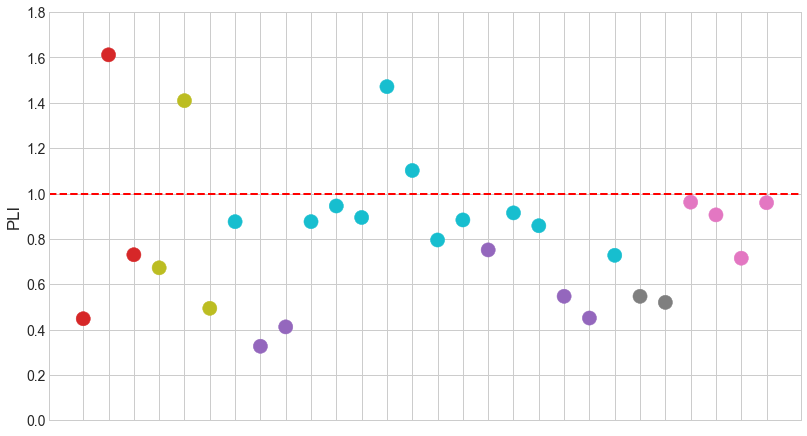

In [157]:
# Plot for PLI by item 

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 7)) 
y = ppp_item["PLI"]
x = ppp_item["Type of item"]

c = ['#d62728', '#d62728', '#d62728', '#bcbd22', '#bcbd22', '#bcbd22', '#17becf', '#9467bd', '#9467bd', '#17becf', 
    '#17becf', '#17becf', '#17becf', '#17becf', '#17becf', '#17becf', '#9467bd', '#17becf', '#17becf', '#9467bd',
    '#9467bd', '#17becf', '#7f7f7f', '#7f7f7f', '#e377c2', '#e377c2', '#e377c2', '#e377c2']
plt.scatter(x, y, c=c, s=200)
plt.axhline(1, c = 'r', linewidth= 2, ls = "--")
plt.ylim(0,1.8)
plt.ylabel("PLI")
plt.xticks(x, "")
plt.savefig("PLI_item.png")

annotations = ppp_item["Type of item"]

# for i, label in enumerate(annotations):
#     plt.annotate(label, (x[i], y[i]))

plt.show()


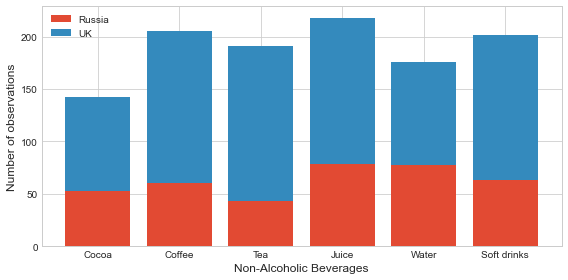

In [138]:
# Non-Alcoholic Beverages by Country

plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
df = pd.concat([data_vis['Russia'],data_vis["UK"]], axis=1)
df = np.array([data_vis['Russia'],data_vis["UK"]])


df.shape[1]   
df.shape[0]
              
color_list = ['#d62728', '#e377c2']

X = ['Cocoa', 'Coffee', 'Tea', 'Juice', 'Water', 'Soft drinks']

plt.figure(figsize=(8, 4))

for i in range(df.shape[0]):
    plt.bar(X, df[i],
    bottom = np.sum(df[:i], axis = 0))

plt.legend(["Russia", "UK"])
plt.ylabel('Number of observations', fontsize=12)
plt.xlabel('Non-Alcoholic Beverages', fontsize=12)
plt.tight_layout()


plt.show()

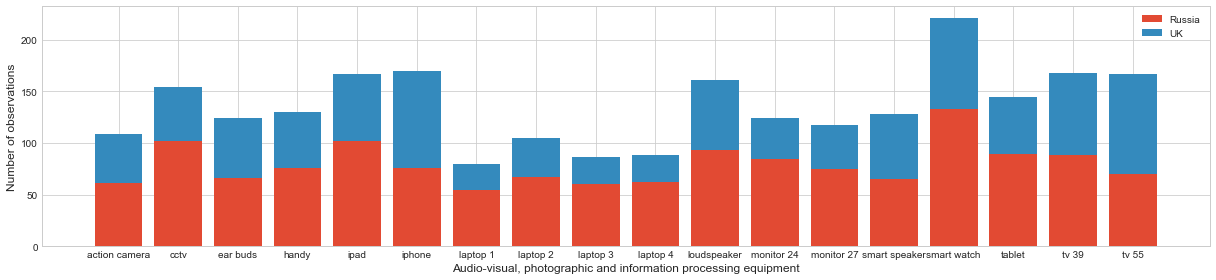

In [139]:
# Electronics by Country

data_vis = pd.read_excel("C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Data_for vizualization.xlsx", sheet_name = "Country_Electr")
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
df = pd.concat([data_vis['Russia'],data_vis["UK"]], axis=1)
df = np.array([data_vis['Russia'],data_vis["UK"]])


df.shape[1]   
df.shape[0]
              
color_list = ['#d62728', '#e377c2']

X = data_vis["Type of item"]

plt.figure(figsize=(17, 4))

for i in range(df.shape[0]):
    plt.bar(X, df[i],
    bottom = np.sum(df[:i], axis = 0))

plt.legend(["Russia", "UK"])
plt.ylabel('Number of observations', fontsize=12)
plt.xlabel('Audio-visual, photographic and information processing equipment', fontsize=12)
plt.tight_layout()


plt.show()

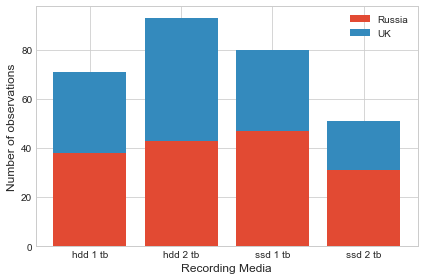

In [142]:
# Electronics by Country


data_vis = pd.read_excel("C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Data_for vizualization.xlsx", sheet_name = "Info_storage")
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
df = pd.concat([data_vis['Russia'],data_vis["UK"]], axis=1)
df = np.array([data_vis['Russia'],data_vis["UK"]])


df.shape[1]   
df.shape[0]
              
color_list = ['#d62728', '#e377c2']

X = data_vis["Type of item"]

plt.figure(figsize=(6, 4))

for i in range(df.shape[0]):
    plt.bar(X, df[i],
    bottom = np.sum(df[:i], axis = 0))

plt.legend(["Russia", "UK"])
plt.ylabel('Number of observations', fontsize=12)
plt.xlabel('Recording Media', fontsize=12)
plt.tight_layout()


# plt.show()

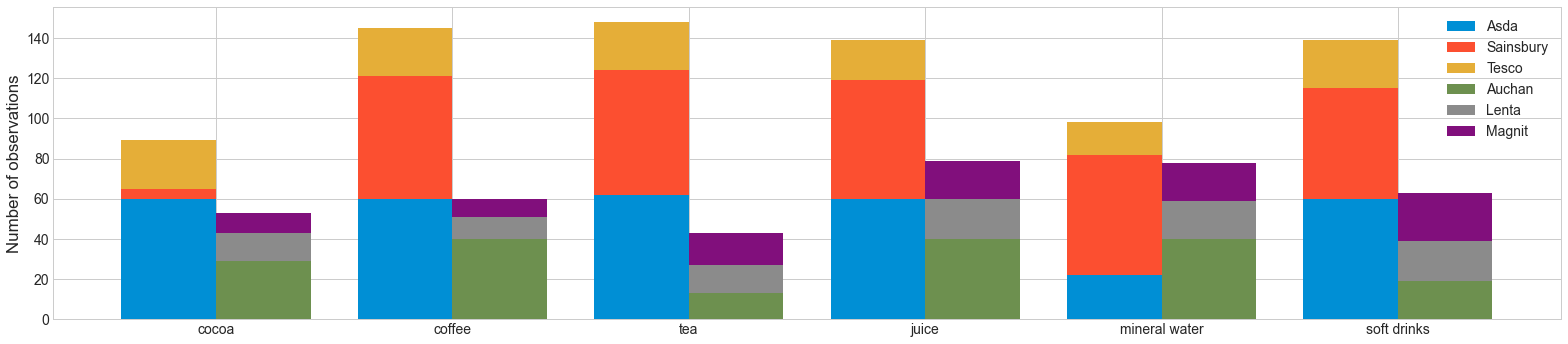

In [143]:
# Non-alcoholic Beverages by Retailer

data_vis = pd.read_excel("C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Data_for vizualization.xlsx", sheet_name = "Retail_non_alc")
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-whitegrid')

plt.style.use('seaborn-whitegrid')

df1 = pd.concat([data_vis['Asda'],data_vis["Sainsbury"], data_vis["Tesco"]], axis=1)
df2 = pd.concat([data_vis['Auchan'],data_vis["Lenta"], data_vis["Magnit"]], axis=1)
df1 = np.array([data_vis['Asda'],data_vis["Sainsbury"], data_vis["Tesco"]])
df2 = np.array([data_vis['Auchan'],data_vis["Lenta"], data_vis["Magnit"]])


labels = data_vis["Type of item"]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

# labels_UK = ["Argos", "Tesco"]
# labels_Russia = ["Magnit", "Lenta"]

fig, ax = plt.subplots(figsize = (22,5))

for i in range(df1.shape[0]):
  rects1 = ax.bar(x - width/2, df1[i], width,
    bottom = np.sum(df1[:i], axis = 0))
    

for z in range(df2.shape[0]):
  rects2 = ax.bar(x + width/2, df2[z], width,
    bottom = np.sum(df2[:z], axis = 0))



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of observations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(["Asda", "Sainsbury", "Tesco", "Auchan", "Lenta", "Magnit"])


fig.tight_layout()

plt.show()

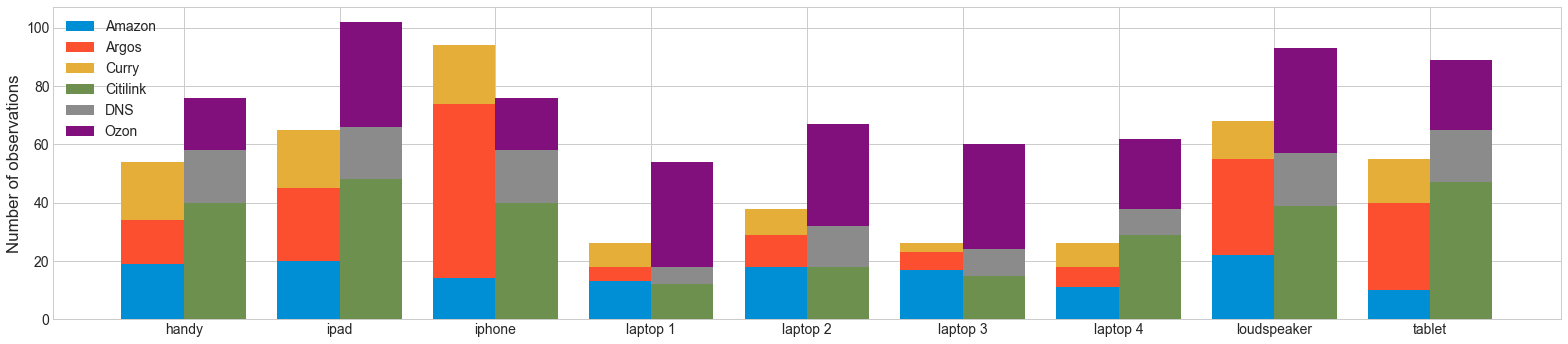

In [144]:
# Electronics by Retailer

data_vis = pd.read_excel("C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Data_for vizualization.xlsx", sheet_name = "Retailer_electr")
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-whitegrid')

plt.style.use('seaborn-whitegrid')

df1 = pd.concat([data_vis['Amazon'],data_vis["Argos"], data_vis["Curry"]], axis=1)
df2 = pd.concat([data_vis['Citilink'],data_vis["DNS"], data_vis["Ozon"]], axis=1)
df1 = np.array([data_vis['Amazon'],data_vis["Argos"], data_vis["Curry"]])
df2 = np.array([data_vis['Citilink'],data_vis["DNS"], data_vis["Ozon"]])


labels = data_vis["Type of item"]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars


fig, ax = plt.subplots(figsize = (22,5))

for i in range(df1.shape[0]):
  rects1 = ax.bar(x - width/2, df1[i], width,
    bottom = np.sum(df1[:i], axis = 0))
    

for z in range(df2.shape[0]):
  rects2 = ax.bar(x + width/2, df2[z], width,
    bottom = np.sum(df2[:z], axis = 0))



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of observations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(["Amazon", "Argos", "Curry", "Citilink", "DNS", "Ozon"])


fig.tight_layout()

plt.show()

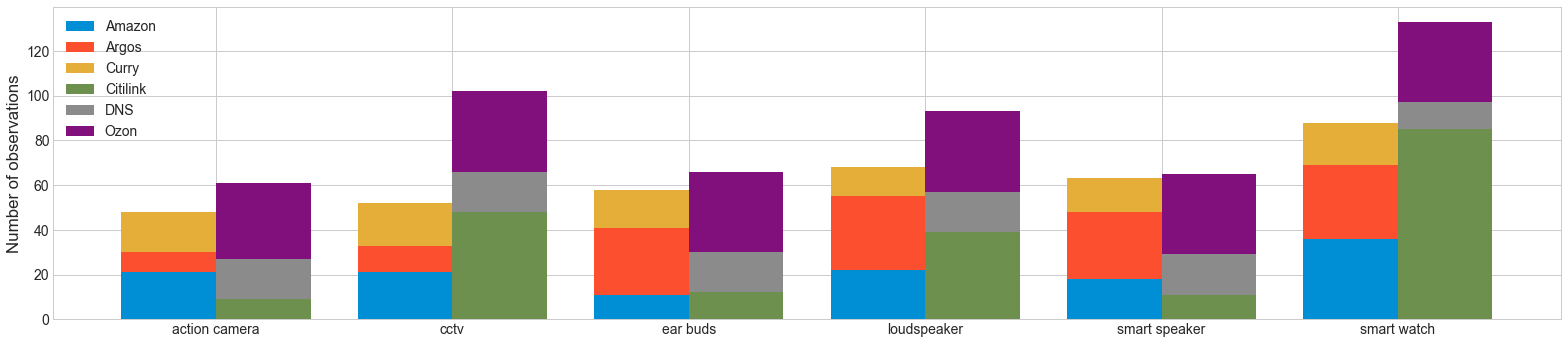

In [145]:
# Electronics by Retailer

data_vis = pd.read_excel("C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Data_for vizualization.xlsx", sheet_name = "Retailer_electr_1")
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-whitegrid')

plt.style.use('seaborn-whitegrid')

df1 = pd.concat([data_vis['Amazon'],data_vis["Argos"], data_vis["Curry"]], axis=1)
df2 = pd.concat([data_vis['Citilink'],data_vis["DNS"], data_vis["Ozon"]], axis=1)
df1 = np.array([data_vis['Amazon'],data_vis["Argos"], data_vis["Curry"]])
df2 = np.array([data_vis['Citilink'],data_vis["DNS"], data_vis["Ozon"]])


labels = data_vis["Type of item"]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

# labels_UK = ["Argos", "Tesco"]
# labels_Russia = ["Magnit", "Lenta"]

fig, ax = plt.subplots(figsize = (22,5))

for i in range(df1.shape[0]):
  rects1 = ax.bar(x - width/2, df1[i], width,
    bottom = np.sum(df1[:i], axis = 0))
    

for z in range(df2.shape[0]):
  rects2 = ax.bar(x + width/2, df2[z], width,
    bottom = np.sum(df2[:z], axis = 0))



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of observations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(["Amazon", "Argos", "Curry", "Citilink", "DNS", "Ozon"])


fig.tight_layout()

plt.show()

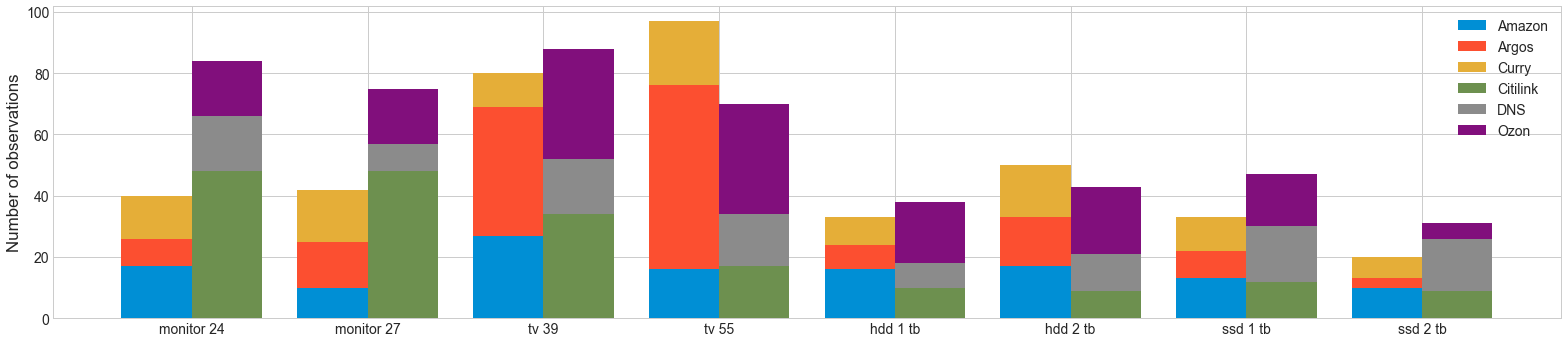

In [146]:
# Electronics by Retailer

data_vis = pd.read_excel("C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Data_for vizualization.xlsx", sheet_name = "Retailer_electr _2")
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-whitegrid')

plt.style.use('seaborn-whitegrid')

df1 = pd.concat([data_vis['Amazon'],data_vis["Argos"], data_vis["Curry"]], axis=1)
df2 = pd.concat([data_vis['Citilink'],data_vis["DNS"], data_vis["Ozon"]], axis=1)
df1 = np.array([data_vis['Amazon'],data_vis["Argos"], data_vis["Curry"]])
df2 = np.array([data_vis['Citilink'],data_vis["DNS"], data_vis["Ozon"]])


labels = data_vis["Type of item"]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

# labels_UK = ["Argos", "Tesco"]
# labels_Russia = ["Magnit", "Lenta"]

fig, ax = plt.subplots(figsize = (22,5))

for i in range(df1.shape[0]):
  rects1 = ax.bar(x - width/2, df1[i], width,
    bottom = np.sum(df1[:i], axis = 0))
    

for z in range(df2.shape[0]):
  rects2 = ax.bar(x + width/2, df2[z], width,
    bottom = np.sum(df2[:z], axis = 0))



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of observations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(["Amazon", "Argos", "Curry", "Citilink", "DNS", "Ozon"])


fig.tight_layout()

plt.show()

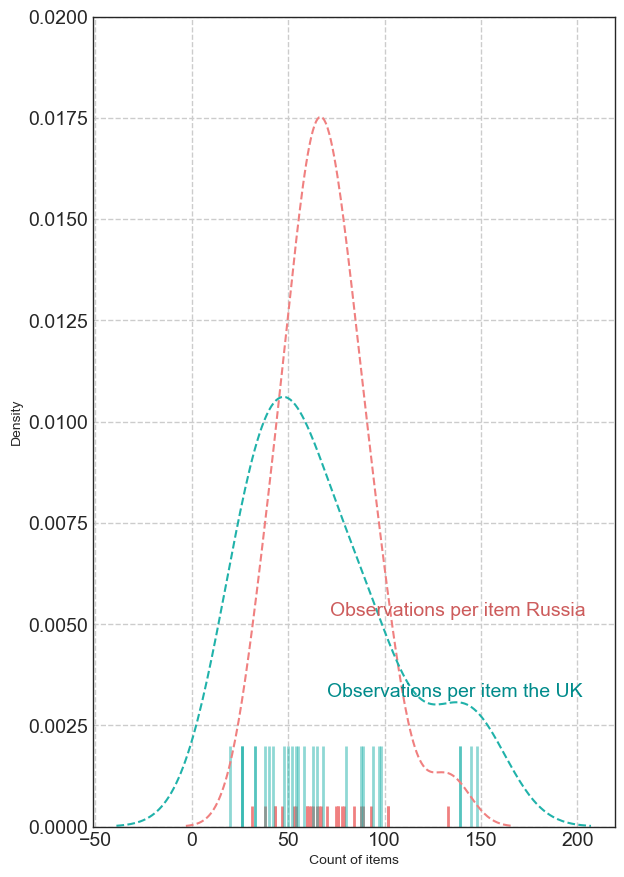

In [147]:
# Distribution of Observations by Items and Countries


df = pd.read_excel("C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Data_for vizualization.xlsx", sheet_name = "Distr_Country")
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['Russia', 'UK']]
data_Russia = data['Russia']
data_UK = data['UK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,10),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.0052, 'Observations per item Russia', color = 'indianred')


plt.text(smean_UK+2,0.0032, 'Observations per item the UK', color = 'darkcyan')


plt.xlabel('Count of items', size = 10)
plt.ylabel('Density', size = 10)
# 
plt.ylim([0,0.02])
plt.grid(linestyle='--')


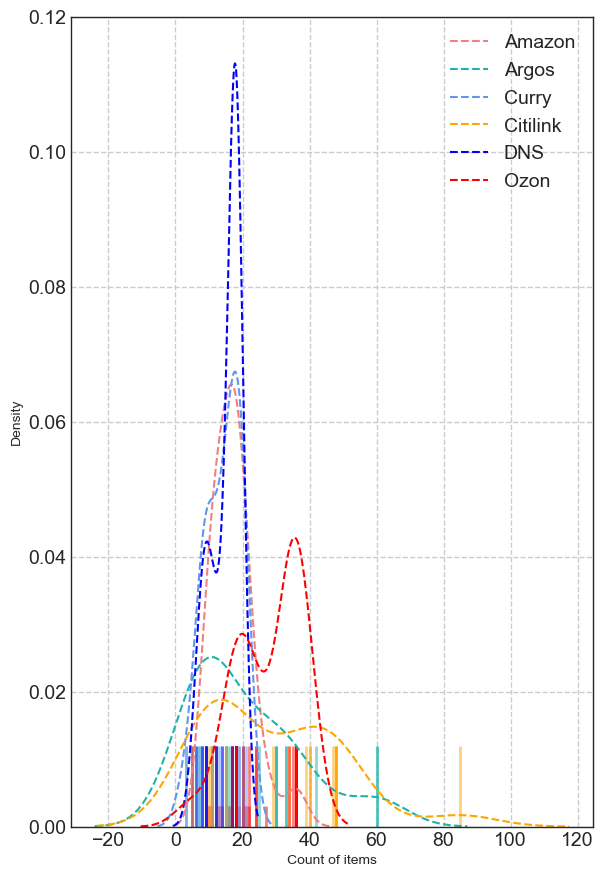

In [159]:
# Distribution of Observations by Items and Retailers

df = pd.read_excel("C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Data_for vizualization.xlsx", sheet_name = "Distr_Retailer_Elect")
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['Amazon', 'Argos', 'Curry', 'Citilink', 'DNS', 'Ozon']]
data_Amazon = data['Amazon']
data_Argos = data['Argos']
data_Curry = data['Curry']
data_Citilink = data['Citilink']
data_DNS = data['DNS']
data_Ozon = data['Ozon']

smean_Amazon = data_Amazon.mean()
smean_Argos = data_Argos.mean()
smean_Curry = data_Curry.mean()
smean_Citilink = data_Citilink.mean()
smean_DNS = data_DNS.mean()
smean_Ozon = data_Ozon.mean()

sns.set_style("ticks")

plt.figure(figsize=(6,10),dpi=100) 
sns.distplot(data_Amazon, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_Argos, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )

sns.distplot(data_Curry, hist=False, kde=True, rug=True,
kde_kws={"color":"cornflowerblue", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':"cornflowerblue", 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )

sns.distplot(data_Citilink, hist=False, kde=True, rug=True,
kde_kws={"color":"orange", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':"orange", 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )

sns.distplot(data_DNS, hist=False, kde=True, rug=True,
kde_kws={"color":"blue", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'blue', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )

sns.distplot(data_Ozon, hist=False, kde=True, rug=True,
kde_kws={"color":"red", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'red', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )

plt.legend(['Amazon', 'Argos', 'Curry', 'Citilink', 'DNS', 'Ozon'])

plt.xlabel('Count of items', size = 10)
plt.ylabel('Density', size = 10)
# 
plt.ylim([0,0.12])
plt.grid(linestyle='--')

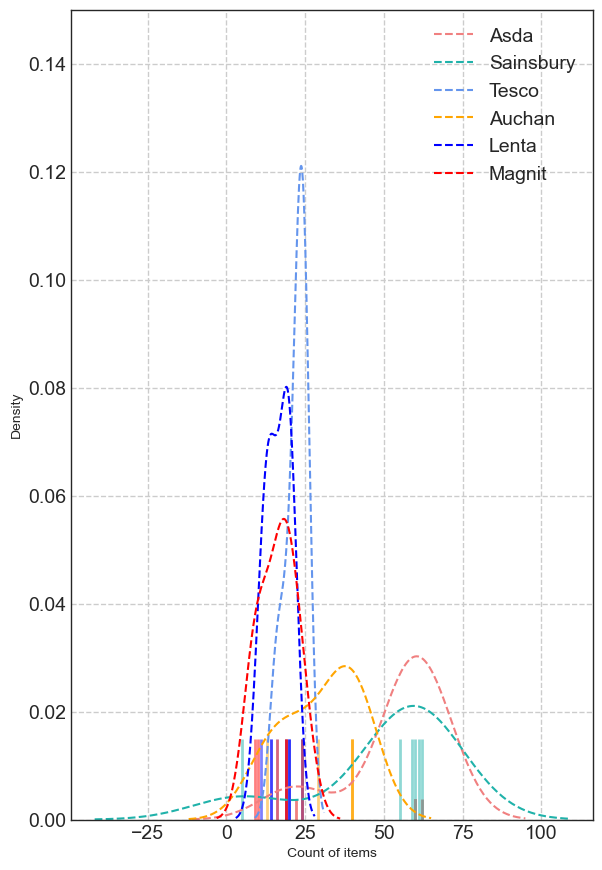

In [158]:
# Distribution of Observations by Items and Retailers

df = pd.read_excel("C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Data_for vizualization.xlsx", sheet_name = "Distr_Retailer_Non_alc")
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['Asda', 'Sainsbury', 'Tesco', 'Auchan', 'Lenta', 'Magnit']]
data_Amazon = data['Asda']
data_Argos = data['Sainsbury']
data_Curry = data['Tesco']
data_Citilink = data['Auchan']
data_DNS = data['Lenta']
data_Ozon = data['Magnit']

smean_Amazon = data_Amazon.mean()
smean_Argos = data_Argos.mean()
smean_Curry = data_Curry.mean()
smean_Citilink = data_Citilink.mean()
smean_DNS = data_DNS.mean()
smean_Ozon = data_Ozon.mean()

sns.set_style("ticks")

plt.figure(figsize=(6,10),dpi=100) 

sns.distplot(data_Amazon, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')

sns.distplot(data_Argos, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )

sns.distplot(data_Curry, hist=False, kde=True, rug=True,
kde_kws={"color":"cornflowerblue", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':"cornflowerblue", 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )

sns.distplot(data_Citilink, hist=False, kde=True, rug=True,
kde_kws={"color":"orange", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':"orange", 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )

sns.distplot(data_DNS, hist=False, kde=True, rug=True,
kde_kws={"color":"blue", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'blue', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )

sns.distplot(data_Ozon, hist=False, kde=True, rug=True,
kde_kws={"color":"red", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'red', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )

plt.legend(['Asda', 'Sainsbury', 'Tesco', 'Auchan', 'Lenta', 'Magnit'])


plt.xlabel('Count of items', size = 10)
plt.ylabel('Density', size = 10)
# 
plt.ylim([0,0.15])
plt.grid(linestyle='--')

<function matplotlib.pyplot.show(close=None, block=None)>

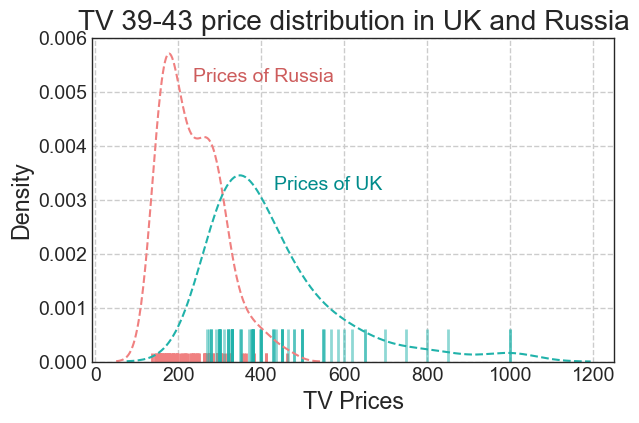

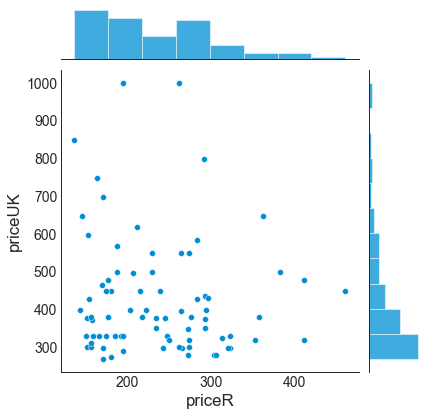

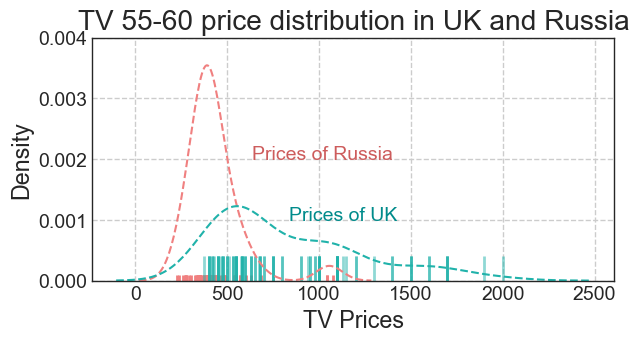

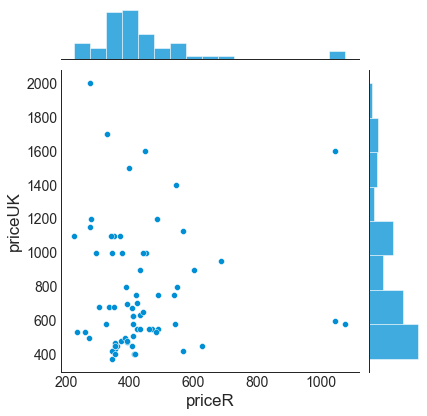

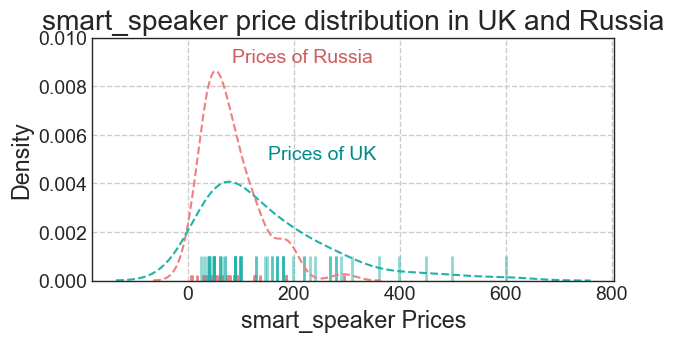

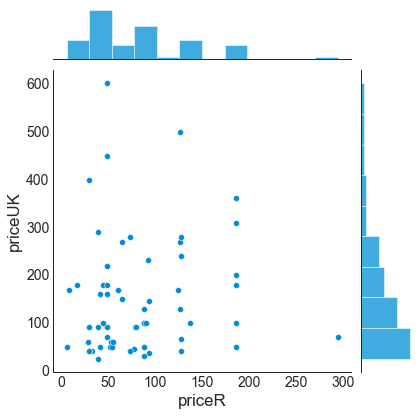

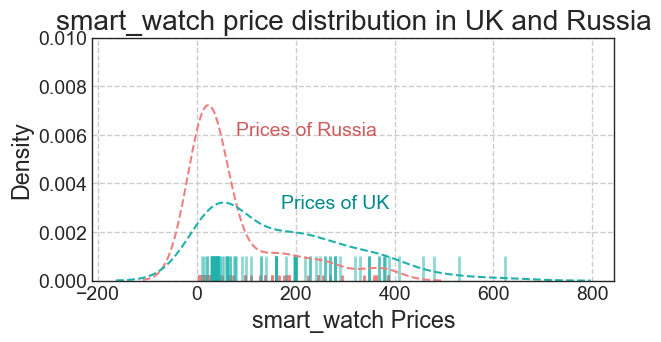

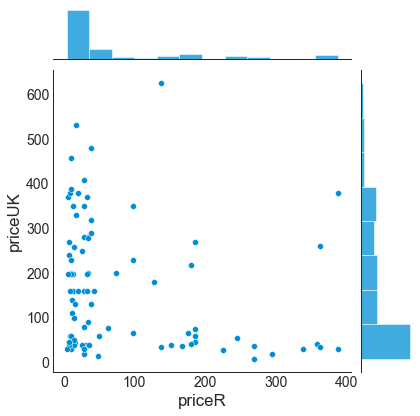

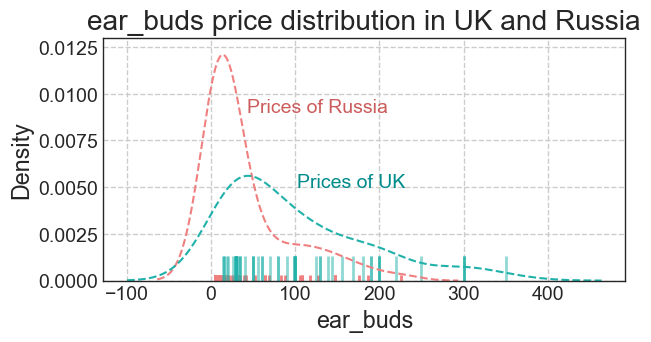

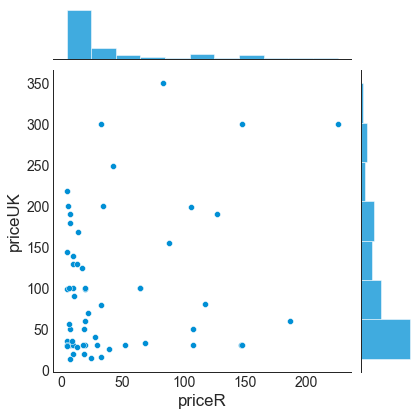

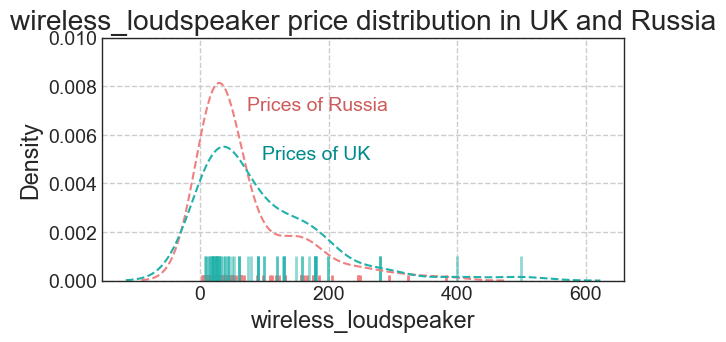

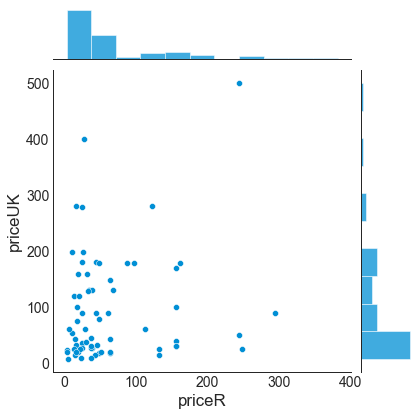

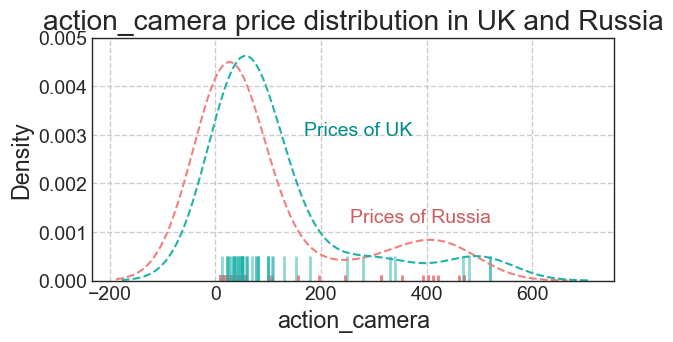

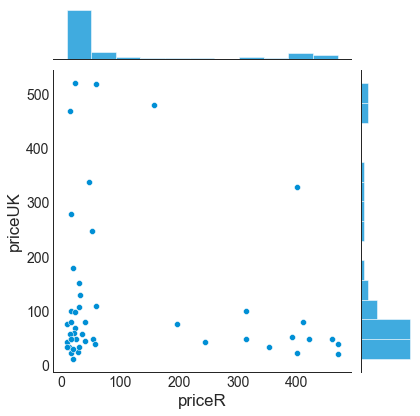

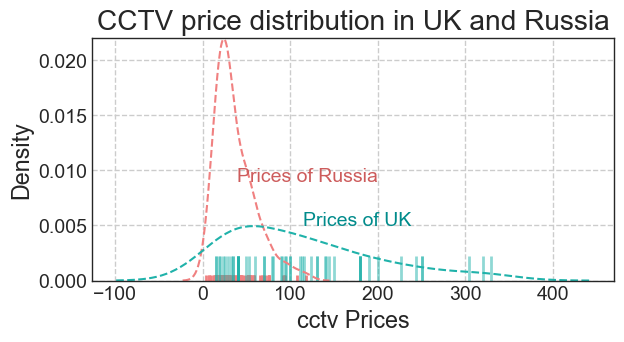

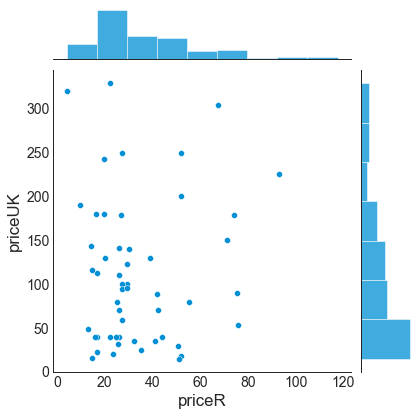

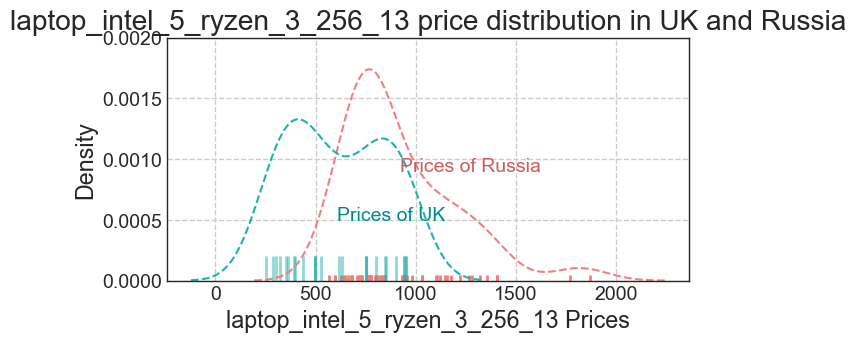

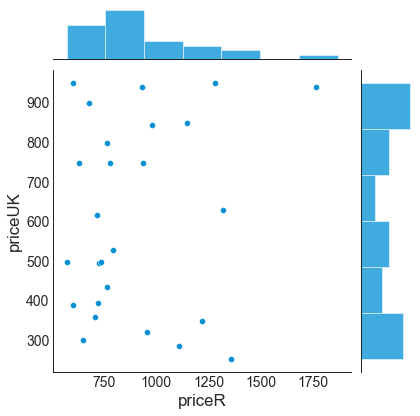

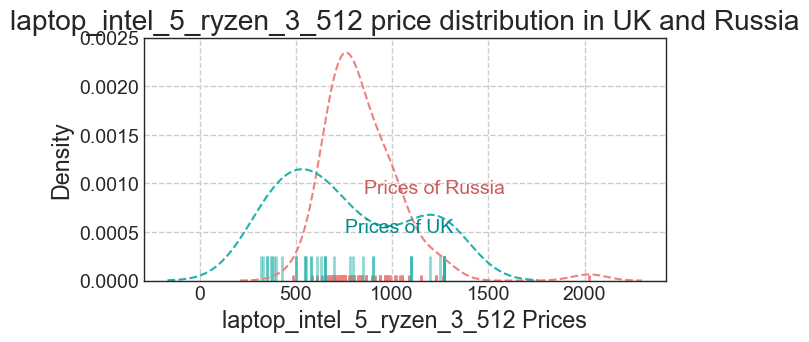

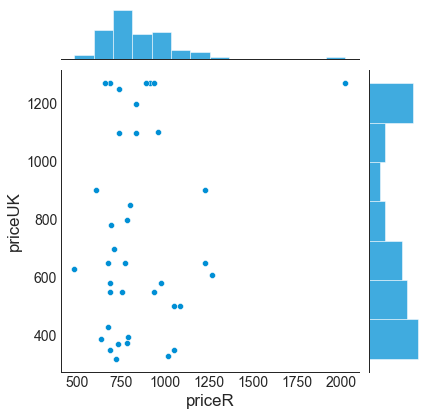

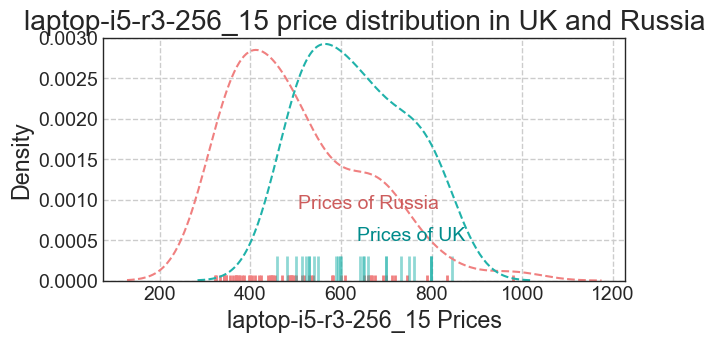

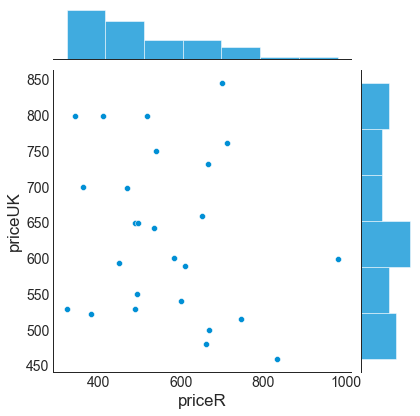

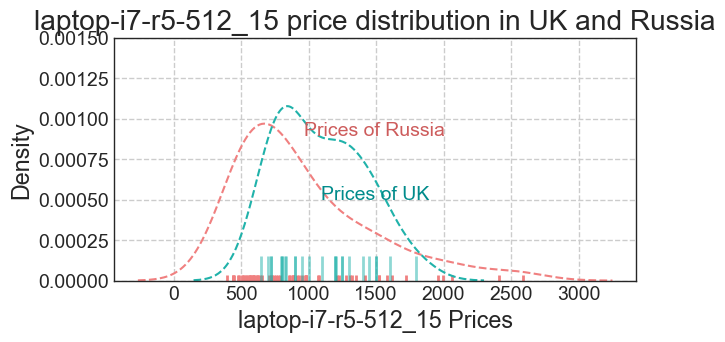

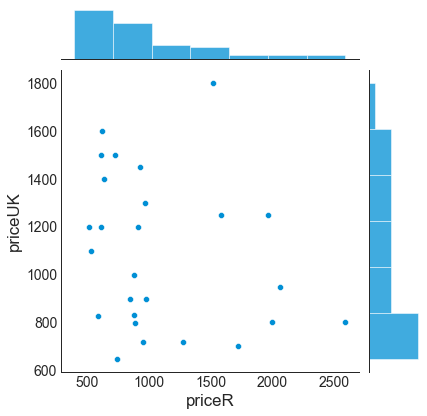

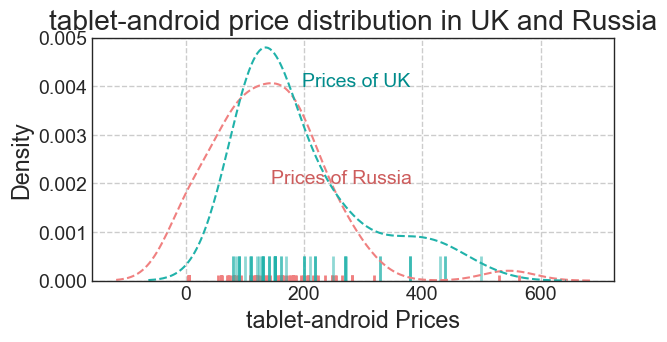

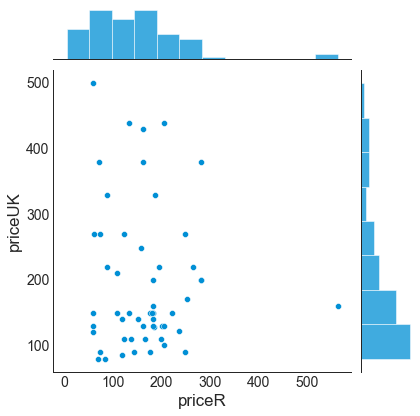

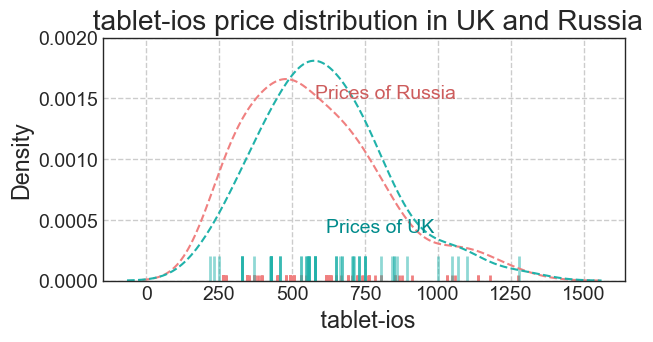

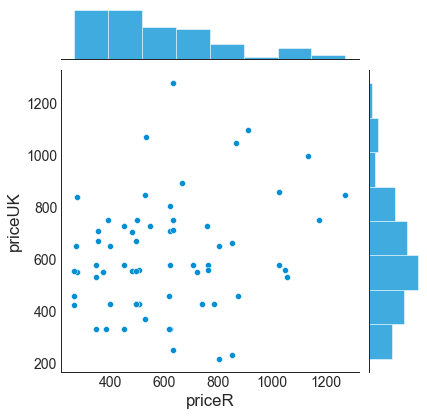

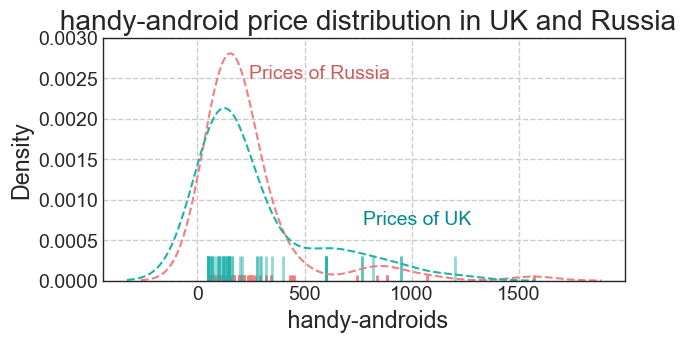

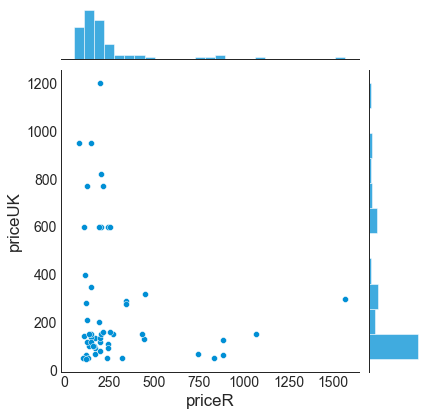

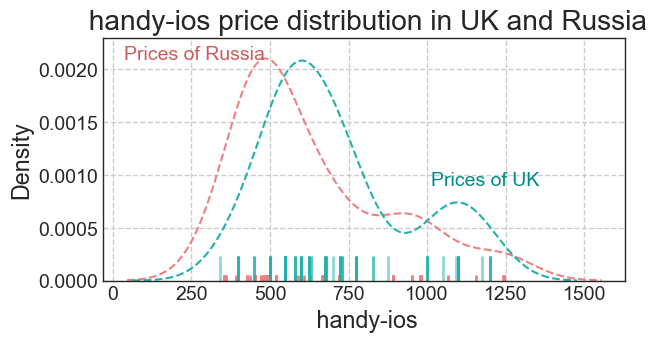

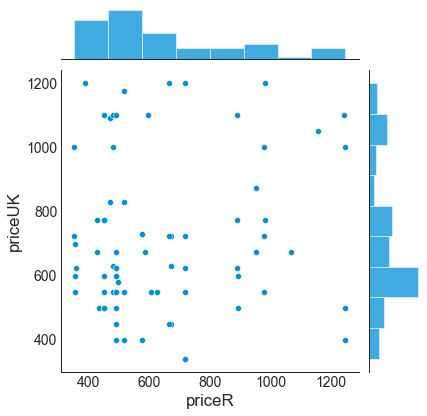

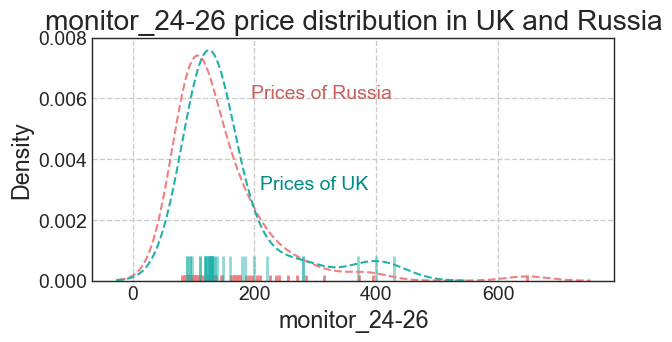

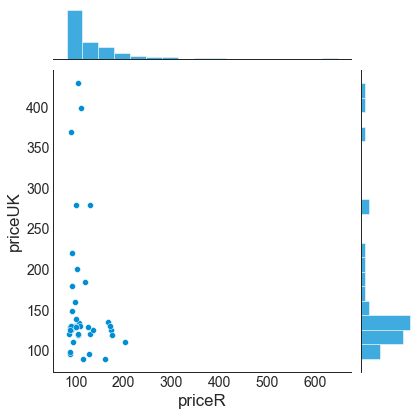

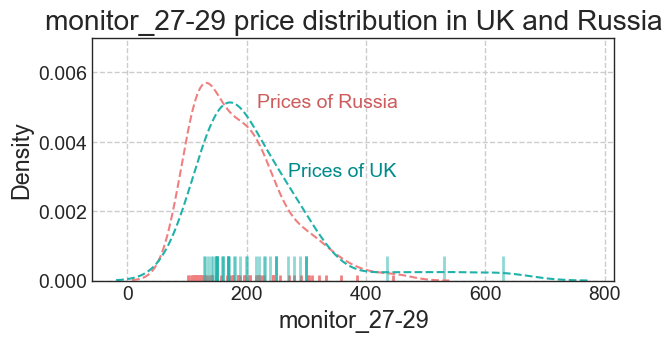

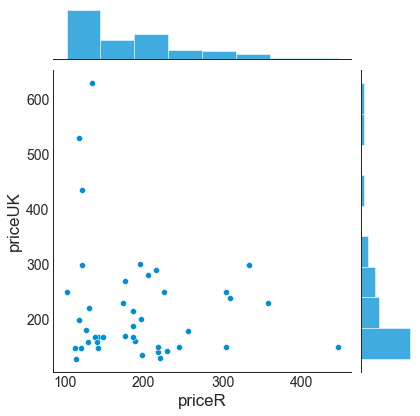

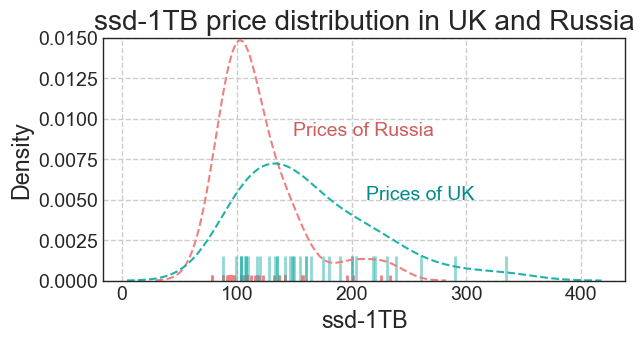

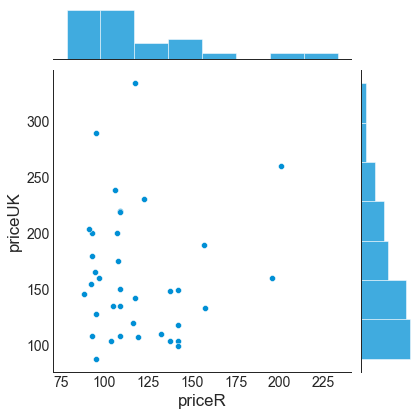

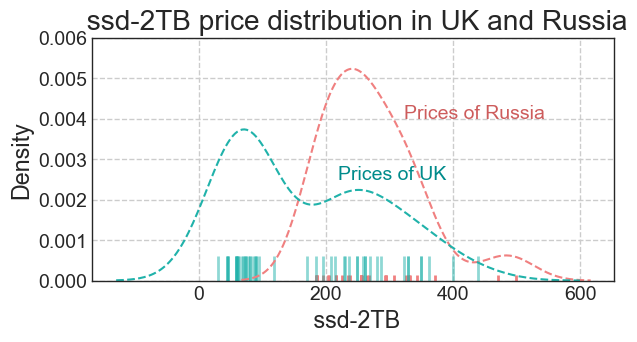

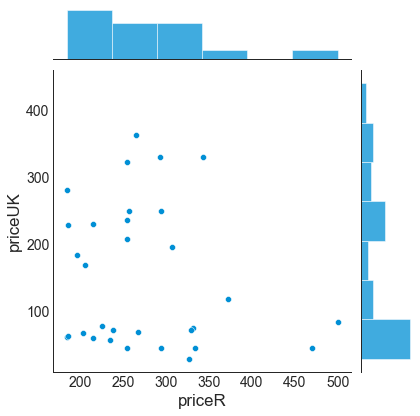

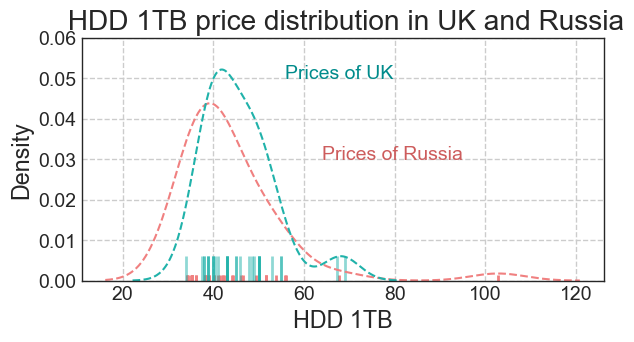

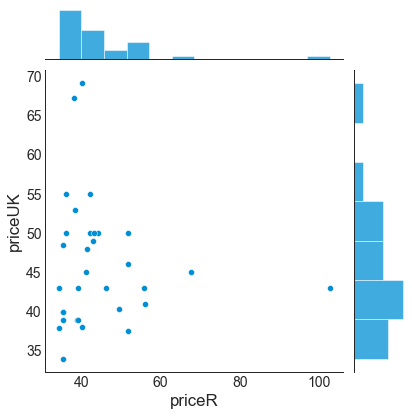

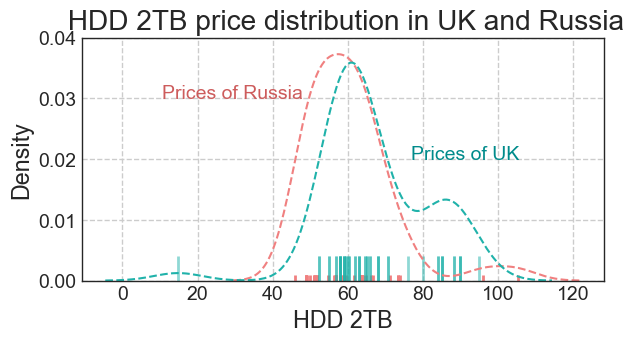

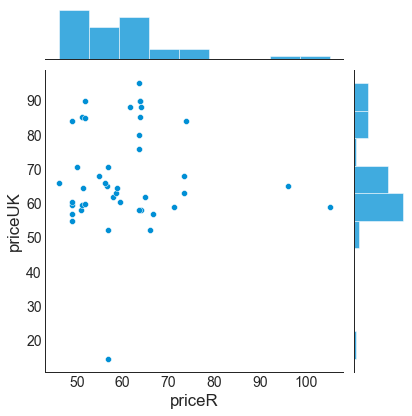

In [169]:
# Distribution of every item 
df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='1. tv_39_43')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,4),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.0052, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+2,0.0032, 'Prices of UK', color = 'darkcyan')


plt.xlabel('TV Prices')
# 
plt.ylim([0,0.006])
plt.grid(linestyle='--')
plt.title(("TV 39-43 price distribution in UK and Russia"))

sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[3]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='2. tv_55-60')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+200,0.002, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+2,0.001, 'Prices of UK', color = 'darkcyan')


plt.xlabel('TV Prices')
# 
plt.ylim([0,0.004])
plt.grid(linestyle='--')
plt.title(("TV 55-60 price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)



df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='3. smart_speaker')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.009, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+2,0.005, 'Prices of UK', color = 'darkcyan')


plt.xlabel('smart_speaker Prices')
# 
plt.ylim([0,0.01])
plt.grid(linestyle='--')
plt.title(("smart_speaker price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)




df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='4. smart_watch')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.006, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+2,0.003, 'Prices of UK', color = 'darkcyan')


plt.xlabel('smart_watch Prices')
# 
plt.ylim([0,0.01])
plt.grid(linestyle='--')
plt.title(("smart_watch price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[6]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='5. ear_buds')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.009, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+2,0.005, 'Prices of UK', color = 'darkcyan')


plt.xlabel('ear_buds')
# 
plt.ylim([0,0.013])
plt.grid(linestyle='--')
plt.title(("ear_buds price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[7]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='6. wireless_loudspeaker')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.007, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+2,0.005, 'Prices of UK', color = 'darkcyan')


plt.xlabel('wireless_loudspeaker')
# 
plt.ylim([0,0.01])
plt.grid(linestyle='--')
plt.title(("wireless_loudspeaker price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[8]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='7. action_camera')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+150,0.0012, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+50,0.003, 'Prices of UK', color = 'darkcyan')


plt.xlabel('action_camera')
# 
plt.ylim([0,0.005])
plt.grid(linestyle='--')
plt.title(("action_camera price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[9]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='8. cctv')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.009, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+2,0.005, 'Prices of UK', color = 'darkcyan')


plt.xlabel('cctv Prices')
# 
plt.ylim([0,0.022])
plt.grid(linestyle='--')
plt.title(("CCTV price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[10]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='9. laptop_intel_5_ryzen_3_256_1')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.0009, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+2,0.0005, 'Prices of UK', color = 'darkcyan')


plt.xlabel('laptop_intel_5_ryzen_3_256_13 Prices')
# 
plt.ylim([0,0.002])
plt.grid(linestyle='--')
plt.title(("laptop_intel_5_ryzen_3_256_13 price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[11]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='10. laptop_intel_5_ryzen_3_512_')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.0009, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+2,0.0005, 'Prices of UK', color = 'darkcyan')


plt.xlabel('laptop_intel_5_ryzen_3_512 Prices')
# 
plt.ylim([0,0.0025])
plt.grid(linestyle='--')
plt.title(("laptop_intel_5_ryzen_3_512 price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[12]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='11. laptop-i5-r3-256_15')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.0009, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+2,0.0005, 'Prices of UK', color = 'darkcyan')


plt.xlabel('laptop-i5-r3-256_15 Prices')
# 
plt.ylim([0,0.003])
plt.grid(linestyle='--')
plt.title(("laptop-i5-r3-256_15 price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[13]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='12. laptop-i7-r5-512_15')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.0009, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+2,0.0005, 'Prices of UK', color = 'darkcyan')


plt.xlabel('laptop-i7-r5-512_15 Prices')
# 
plt.ylim([0,0.0015])
plt.grid(linestyle='--')
plt.title(("laptop-i7-r5-512_15 price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[14]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='13. tablet-android')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.002, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+2,0.004, 'Prices of UK', color = 'darkcyan')


plt.xlabel('tablet-android Prices')
# 
plt.ylim([0,0.005])
plt.grid(linestyle='--')
plt.title(("tablet-android price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[15]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='14. tablet-ios')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.0015, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+6,0.0004, 'Prices of UK', color = 'darkcyan')


plt.xlabel(' tablet-ios')
# 
plt.ylim([0,0.002])
plt.grid(linestyle='--')
plt.title((" tablet-ios price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[16]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='15. handy-android')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+2,0.0025, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+500,0.0007, 'Prices of UK', color = 'darkcyan')


plt.xlabel(' handy-androids')
# 
plt.ylim([0,0.003])
plt.grid(linestyle='--')
plt.title((" handy-android price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[17]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='16. handy-ios')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia-600,0.0021, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+300,0.0009, 'Prices of UK', color = 'darkcyan')


plt.xlabel(' handy-ios')
# 
plt.ylim([0,0.0023])
plt.grid(linestyle='--')
plt.title((" handy-ios price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[18]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='17. monitor_24-26')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+50,0.006, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+50,0.003, 'Prices of UK', color = 'darkcyan')


plt.xlabel('monitor_24-26')
# 
plt.ylim([0,0.008])
plt.grid(linestyle='--')
plt.title(("monitor_24-26 price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[19]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='18. monitor_27-29')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+30,0.005, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+50,0.003, 'Prices of UK', color = 'darkcyan')


plt.xlabel('monitor_27-29')
# 
plt.ylim([0,0.007])
plt.grid(linestyle='--')
plt.title(("monitor_27-29 price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[20]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='19. ssd-1TB')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+30,0.009, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+50,0.005, 'Prices of UK', color = 'darkcyan')


plt.xlabel('ssd-1TB')
# 
plt.ylim([0,0.015])
plt.grid(linestyle='--')
plt.title(("ssd-1TB price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[21]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='20. ssd-2TB')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+50,0.004, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+50,0.0025, 'Prices of UK', color = 'darkcyan')


plt.xlabel(' ssd-2TB')
# 
plt.ylim([0,0.006])
plt.grid(linestyle='--')
plt.title((" ssd-2TB price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[22]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='21.HDD 1TB')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia+20,0.03, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+10,0.05, 'Prices of UK', color = 'darkcyan')


plt.xlabel('HDD 1TB')
# 
plt.ylim([0,0.06])
plt.grid(linestyle='--')
plt.title((" HDD 1TB price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# In[23]:


df = pd.read_excel('C:\\Users\\khari\\Desktop\\Siegen\\Applied Macroeconometrics\\Final Project\\Topic 10\\market_analysis\\Price distribution of electrical appliances.xlsx',sheet_name ='22.HDD 2TB')
df_length=len(df)  
df_columns=df.columns.tolist()  
data=df[['priceR', 'priceUK']]
data_Russia = data['priceR']
data_UK = data['priceUK']
smean_Russia = data_Russia.mean()
smean_UK = data_UK.mean()
sns.set_style("ticks")
plt.figure(figsize=(6,3),dpi=100) 
sns.distplot(data_Russia, hist=False, kde=True, rug=True,  
kde_kws={"color":"lightcoral", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'lightcoral','alpha':1, 'lw':2,},label='R')


sns.distplot(data_UK, hist=False, kde=True, rug=True,
kde_kws={"color":"lightseagreen", "lw":1.5, 'linestyle':'--'}, 
rug_kws={'color':'lightseagreen', 'alpha':0.5, 'lw':2, 'height':0.1},label='UK' )


# 

plt.text(smean_Russia-50,0.03, 'Prices of Russia', color = 'indianred')


plt.text(smean_UK+10,0.02, 'Prices of UK', color = 'darkcyan')


plt.xlabel('HDD 2TB')
# 
plt.ylim([0,0.04])
plt.grid(linestyle='--')
plt.title((" HDD 2TB price distribution in UK and Russia"))
sns.jointplot(x='priceR',y='priceUK',data=df[['priceR', 'priceUK']],)


# For analysis and conclusions please refer to the corresponding Presentation